In [35]:
import pandas as pd
import numpy as np

In [36]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data.txt', header=None, names=column_names, na_values='?')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
nan_vals = df[df.applymap(lambda x:x.strip() if type(x) is str else x).eq('?').any(axis=1)]
nan_vals

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [46]:
df = df.replace('?', np.nan)

In [50]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))


<Axes: xlabel='income', ylabel='count'>

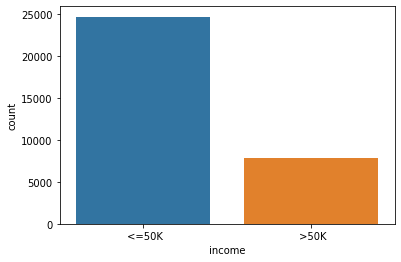

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)

<Axes: xlabel='race', ylabel='count'>

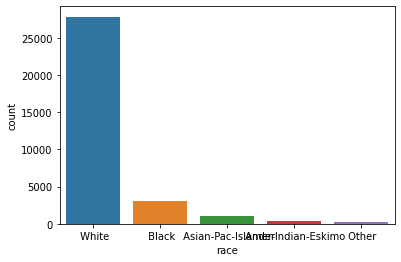

In [54]:
sns.countplot(x='race', data=df)

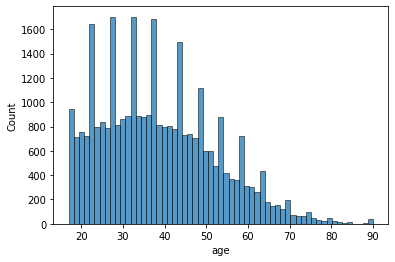

In [57]:
sns.histplot(data=df, x='age')
plt.show()

<Axes: xlabel='income', ylabel='hours-per-week'>

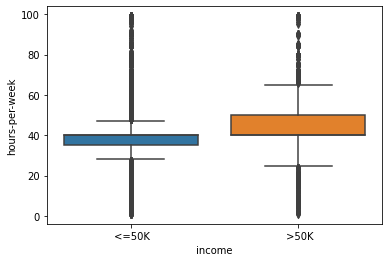

In [59]:
sns.boxplot(x='income', y='hours-per-week', data=df)

In [60]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## relationship between age and income level

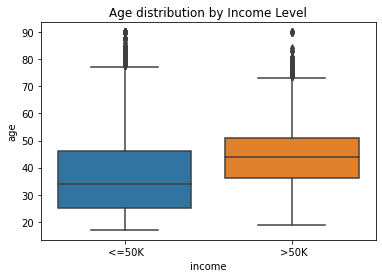

In [66]:

df['income'] = df['income'].astype('category')

sns.boxplot(x='income', y='age', data=df)
plt.title('Age distribution by Income Level')
plt.show()

## How does education level affect income?

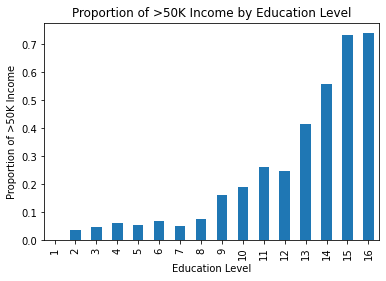

In [92]:
df['income_binary'] = df['income_binary'].astype(int)

income_by_education = df.groupby('education-num')['income_binary'].mean()
income_by_education.plot(kind='bar')
plt.title('Proportion of >50K Income by Education Level')
plt.ylabel('Proportion of >50K Income')
plt.xlabel('Education Level')
plt.show()

## differences in working hours for individuals with different income levels

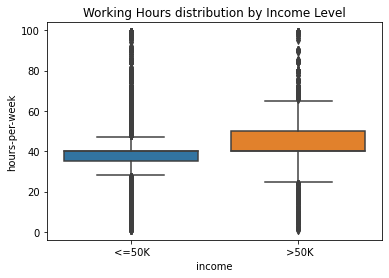

In [94]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Working Hours distribution by Income Level')
plt.show()

## any trends in capital gain/loss for different demographic groups

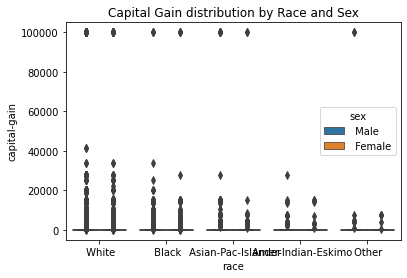

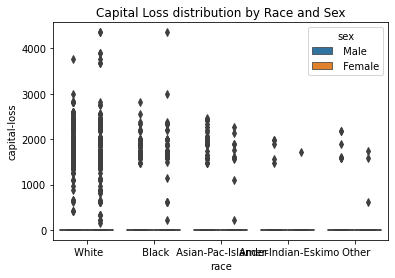

In [96]:
sns.boxplot(x='race', y='capital-gain', hue='sex', data=df)
plt.title('Capital Gain distribution by Race and Sex')
plt.show()

sns.boxplot(x='race', y='capital-loss', hue='sex', data=df)
plt.title('Capital Loss distribution by Race and Sex')
plt.show()

In [99]:
df['net-capital'] = df.apply(lambda row: row['capital-gain']-row['capital-loss'], axis=1)
df['net-capital'] 

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: net-capital, Length: 32561, dtype: int64

In [104]:
average_hours_per_week = df['hours-per-week'].mean()

df['works_more_than_average'] = df['hours-per-week'].apply(lambda x: 1 if x> average_hours_per_week else 0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,net-capital,works_more_than_average
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0


In [107]:
df.sort_values(by=['education-num','age'], ascending=[False, True], inplace=True)

In [108]:
df.iloc[0]

age                                     24
workclass                        State-gov
fnlwgt                              208826
education                        Doctorate
education-num                           16
marital-status               Never-married
occupation                  Prof-specialty
relationship                 Not-in-family
race                                 White
sex                                 Female
capital-gain                             0
capital-loss                             0
hours-per-week                          99
native-country                     England
income                               <=50K
income_binary                            0
net-capital                              0
works_more_than_average                  1
Name: 12788, dtype: object

In [119]:
# white_people = df[df['race']=='White']
# white_people

white_people = df[df['race'] == 'White']
white_people

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,net-capital,works_more_than_average


In [120]:
df.groupby('race')['age'].mean()

race
 Amer-Indian-Eskimo    37.173633
 Asian-Pac-Islander    37.746872
 Black                 37.767926
 Other                 33.457565
 White                 38.769881
Name: age, dtype: float64

In [122]:
pivot_table = df.pivot_table(values='age', index='race', columns='sex', aggfunc=np.mean)
pivot_table

sex,Female,Male
race,,
Amer-Indian-Eskimo,37.117647,37.208333
Asian-Pac-Islander,35.089595,39.073593
Black,37.854019,37.682600
Other,31.678899,34.654321
White,36.811618,39.652498
